In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
df_places = gpd.read_file('./Lisboa.geojson')
df_admin = gpd.read_file('./Lisboa.geojson')

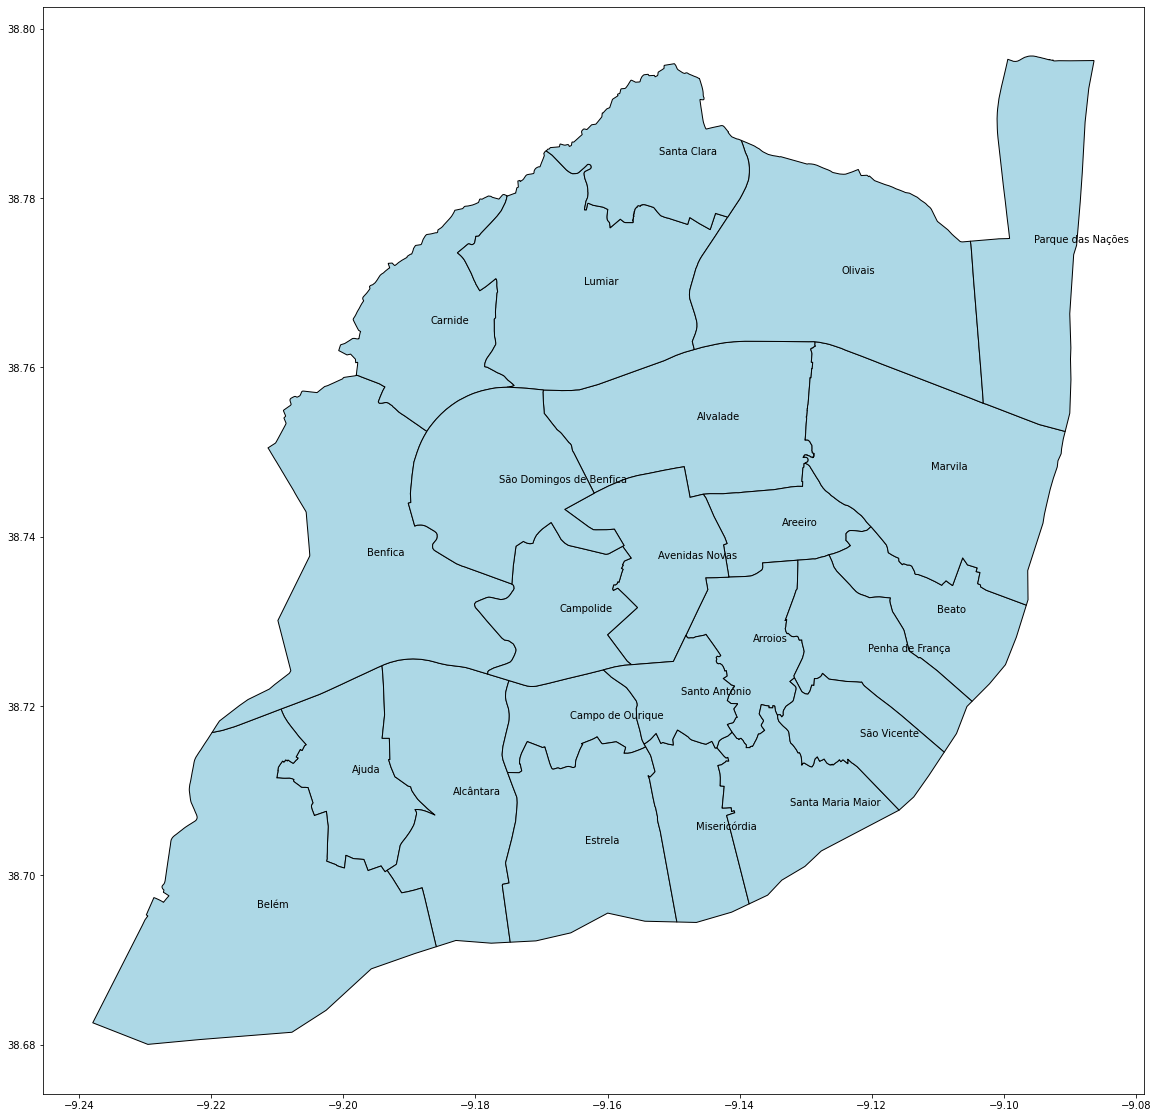

In [2]:
from shapely import geometry

axis = df_places.plot(color="lightblue",edgecolor = "black",figsize = (40,20))

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

#df_places.plot(ax=ax, color='green')


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#axis.set_aspect('equal')

#df_places.plot(ax=axis, color='white', edgecolor='black')

#.plot(ax=ax, marker='o', color='red', markersize=5)

#plt.show()

<AxesSubplot:>

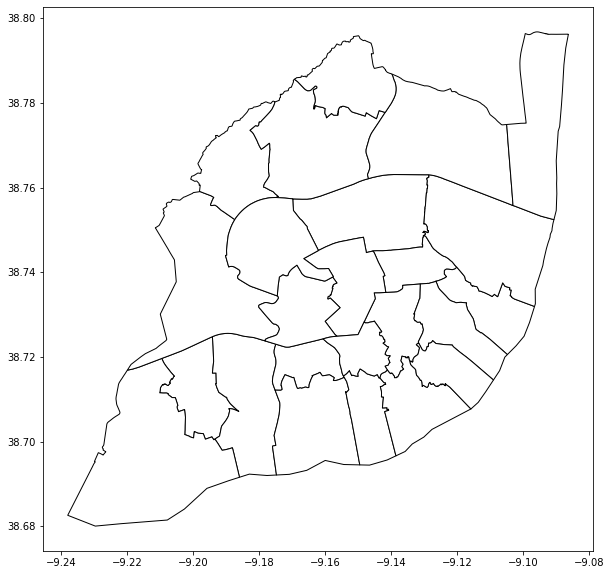

In [3]:
df_places.plot(color='white', edgecolor='black')

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

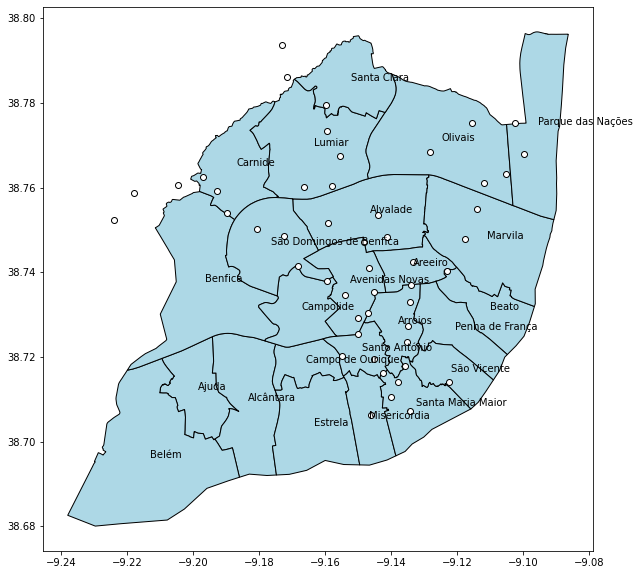

In [4]:
import os

                         
directory = "./archives"
ext = ".geojson"
lista=[]
listadirs=[]
dic={}



def leitura(filtro):
    i=0
    global lista, listadirs, dic
    listafiles=[]
    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1:
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))

def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)


    

leitura(None)
pprint()

a = input("Quais os filtros que deseja:")
leitura(a)


    
fig, ax = plt.subplots(1,1)

ax.set_aspect('equal')
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black")
for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  
for a in lista:
    a.plot(ax=ax, color='white', edgecolor='black', legend=True)
        
    

plt.show()

In [16]:
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black")



<Figure size 1440x720 with 0 Axes>

In [ ]:
#world = df_places[(world.pop_est>0) & (world.name!="Antarctica")]
df_pop